In [16]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import matplotlib.pyplot as plt

from explore.gcp.storage import gcp
from explore.src.preprocess.clean_stats import Cleaning
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.stats_visual import StatsVisuals

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [17]:
df = gcp.read_df_from_bucket(bucket_name="processed_fbref_db", blob_name="processed_keeper_adv.csv")

[03/21/24 18:34:41] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=990379;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=120762;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=460792;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=204476;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [18]:
df.head()

,rk,player,nation,pos,squad,comp,age,born,90s,ga,penalties_allowed,free_kick_goals_allowed,corner_goals_allowed,own_goals,post_shot_xg,post_shot_xg_on_target,post_shot_xg_minus_ga,post_shot_xg_minus_ga_per_90,passes_completed_plus_40_yards,passes_attempted_plus_40_yards,passes_pct_plus_40_yards,total_passes_attempted,throws_attempted,launch_pct,avg_pass_length,goal_kicks_attempted,goal_kick_launch_pct,avg_goal_kick_length,crosses_faced,crosses_stopped,crosses_stopped_pct,defensive_actions_outside_penalty_area,defensive_opa_per_90,avg_defensive_action_distance,season,general_pos,age_range,country,continent,player_id
0,1,Antonio Adán,ESP,GK,Betis,La Liga,30,1987,30.0,53.0,3.0,0.0,5.0,4.0,41.8,0.29,-7.2,-0.24,176.0,490.0,35.9,1002.0,130.0,33.8,32.8,253.0,59.7,44.4,468.0,17.0,3.6,22.0,0.73,14.6,2017-2018,Goalkeeper,30-34,Spain,Europe,13
1,2,René Adler,GER,GK,Mainz 05,Bundesliga,32,1985,14.0,18.0,1.0,0.0,5.0,0.0,14.0,0.25,-4.0,-0.29,78.0,216.0,36.1,322.0,55.0,39.1,36.3,117.0,76.9,54.9,209.0,19.0,9.1,22.0,1.57,15.4,2017-2018,Goalkeeper,30-34,Germany,Europe,17
2,3,Adrián,ESP,GK,West Ham,Premier League,30,1987,19.0,29.0,1.0,1.0,6.0,1.0,27.8,0.29,-0.2,-0.01,154.0,445.0,34.6,383.0,47.0,72.8,47.7,184.0,90.2,59.3,316.0,13.0,4.1,31.0,1.63,16.0,2017-2018,Goalkeeper,30-34,Spain,Europe,20
3,4,Alisson,BRA,GK,Roma,Serie A,24,1992,37.0,28.0,3.0,0.0,2.0,0.0,35.4,0.23,7.4,0.20,213.0,416.0,51.2,1069.0,239.0,28.9,32.1,252.0,42.5,41.0,469.0,17.0,3.6,90.0,2.43,18.9,2017-2018,Goalkeeper,20-24,Brazil,South America,58
4,5,Sergio Álvarez,ESP,GK,Celta Vigo,La Liga,30,1986,16.4,29.0,1.0,0.0,4.0,1.0,23.3,0.31,-4.7,-0.29,110.0,285.0,38.6,494.0,48.0,40.5,36.3,129.0,65.9,50.6,214.0,8.0,3.7,18.0,1.10,14.1,2017-2018,Goalkeeper,30-34,Spain,Europe,66


In [19]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.00,218,1.0,218.00,101.00,101.51,59.21,0,0.00
age,int64,0,0.00,26,17.0,42.00,28.00,28.08,4.79,4,0.29
born,int64,0,0.00,29,1977.0,2005.00,1992.00,1991.54,5.04,1,0.07
90s,float64,0,0.00,239,0.0,38.00,15.00,16.76,13.59,0,0.00
ga,float64,5,0.36,78,0.0,91.00,21.00,23.27,19.31,1,0.07
penalties_allowed,float64,6,0.43,14,0.0,14.00,1.00,2.16,2.30,44,3.14
free_kick_goals_allowed,float64,7,0.50,6,0.0,5.00,0.00,0.46,0.78,38,2.71
corner_goals_allowed,float64,7,0.50,16,0.0,15.00,2.00,2.66,2.71,18,1.28
own_goals,float64,7,0.50,7,0.0,6.00,0.00,0.70,0.99,93,6.64
post_shot_xg,float64,2,0.14,507,0.0,72.10,19.30,21.93,18.19,0,0.00


## Statistical Plots

filter out players that have less than 10 90s

In [21]:
data = df.loc[df['90s'] >= 10]

In [22]:
stat_plots = StatisticPlots(data)

In [23]:
data.head()

,rk,player,nation,pos,squad,comp,age,born,90s,ga,penalties_allowed,free_kick_goals_allowed,corner_goals_allowed,own_goals,post_shot_xg,post_shot_xg_on_target,post_shot_xg_minus_ga,post_shot_xg_minus_ga_per_90,passes_completed_plus_40_yards,passes_attempted_plus_40_yards,passes_pct_plus_40_yards,total_passes_attempted,throws_attempted,launch_pct,avg_pass_length,goal_kicks_attempted,goal_kick_launch_pct,avg_goal_kick_length,crosses_faced,crosses_stopped,crosses_stopped_pct,defensive_actions_outside_penalty_area,defensive_opa_per_90,avg_defensive_action_distance,season,general_pos,age_range,country,continent,player_id
0,1,Antonio Adán,ESP,GK,Betis,La Liga,30,1987,30.0,53.0,3.0,0.0,5.0,4.0,41.8,0.29,-7.2,-0.24,176.0,490.0,35.9,1002.0,130.0,33.8,32.8,253.0,59.7,44.4,468.0,17.0,3.6,22.0,0.73,14.6,2017-2018,Goalkeeper,30-34,Spain,Europe,13
1,2,René Adler,GER,GK,Mainz 05,Bundesliga,32,1985,14.0,18.0,1.0,0.0,5.0,0.0,14.0,0.25,-4.0,-0.29,78.0,216.0,36.1,322.0,55.0,39.1,36.3,117.0,76.9,54.9,209.0,19.0,9.1,22.0,1.57,15.4,2017-2018,Goalkeeper,30-34,Germany,Europe,17
2,3,Adrián,ESP,GK,West Ham,Premier League,30,1987,19.0,29.0,1.0,1.0,6.0,1.0,27.8,0.29,-0.2,-0.01,154.0,445.0,34.6,383.0,47.0,72.8,47.7,184.0,90.2,59.3,316.0,13.0,4.1,31.0,1.63,16.0,2017-2018,Goalkeeper,30-34,Spain,Europe,20
3,4,Alisson,BRA,GK,Roma,Serie A,24,1992,37.0,28.0,3.0,0.0,2.0,0.0,35.4,0.23,7.4,0.20,213.0,416.0,51.2,1069.0,239.0,28.9,32.1,252.0,42.5,41.0,469.0,17.0,3.6,90.0,2.43,18.9,2017-2018,Goalkeeper,20-24,Brazil,South America,58
4,5,Sergio Álvarez,ESP,GK,Celta Vigo,La Liga,30,1986,16.4,29.0,1.0,0.0,4.0,1.0,23.3,0.31,-4.7,-0.29,110.0,285.0,38.6,494.0,48.0,40.5,36.3,129.0,65.9,50.6,214.0,8.0,3.7,18.0,1.10,14.1,2017-2018,Goalkeeper,30-34,Spain,Europe,66


In [24]:
cols = data.columns[9:-6].tolist()
len(cols)

25

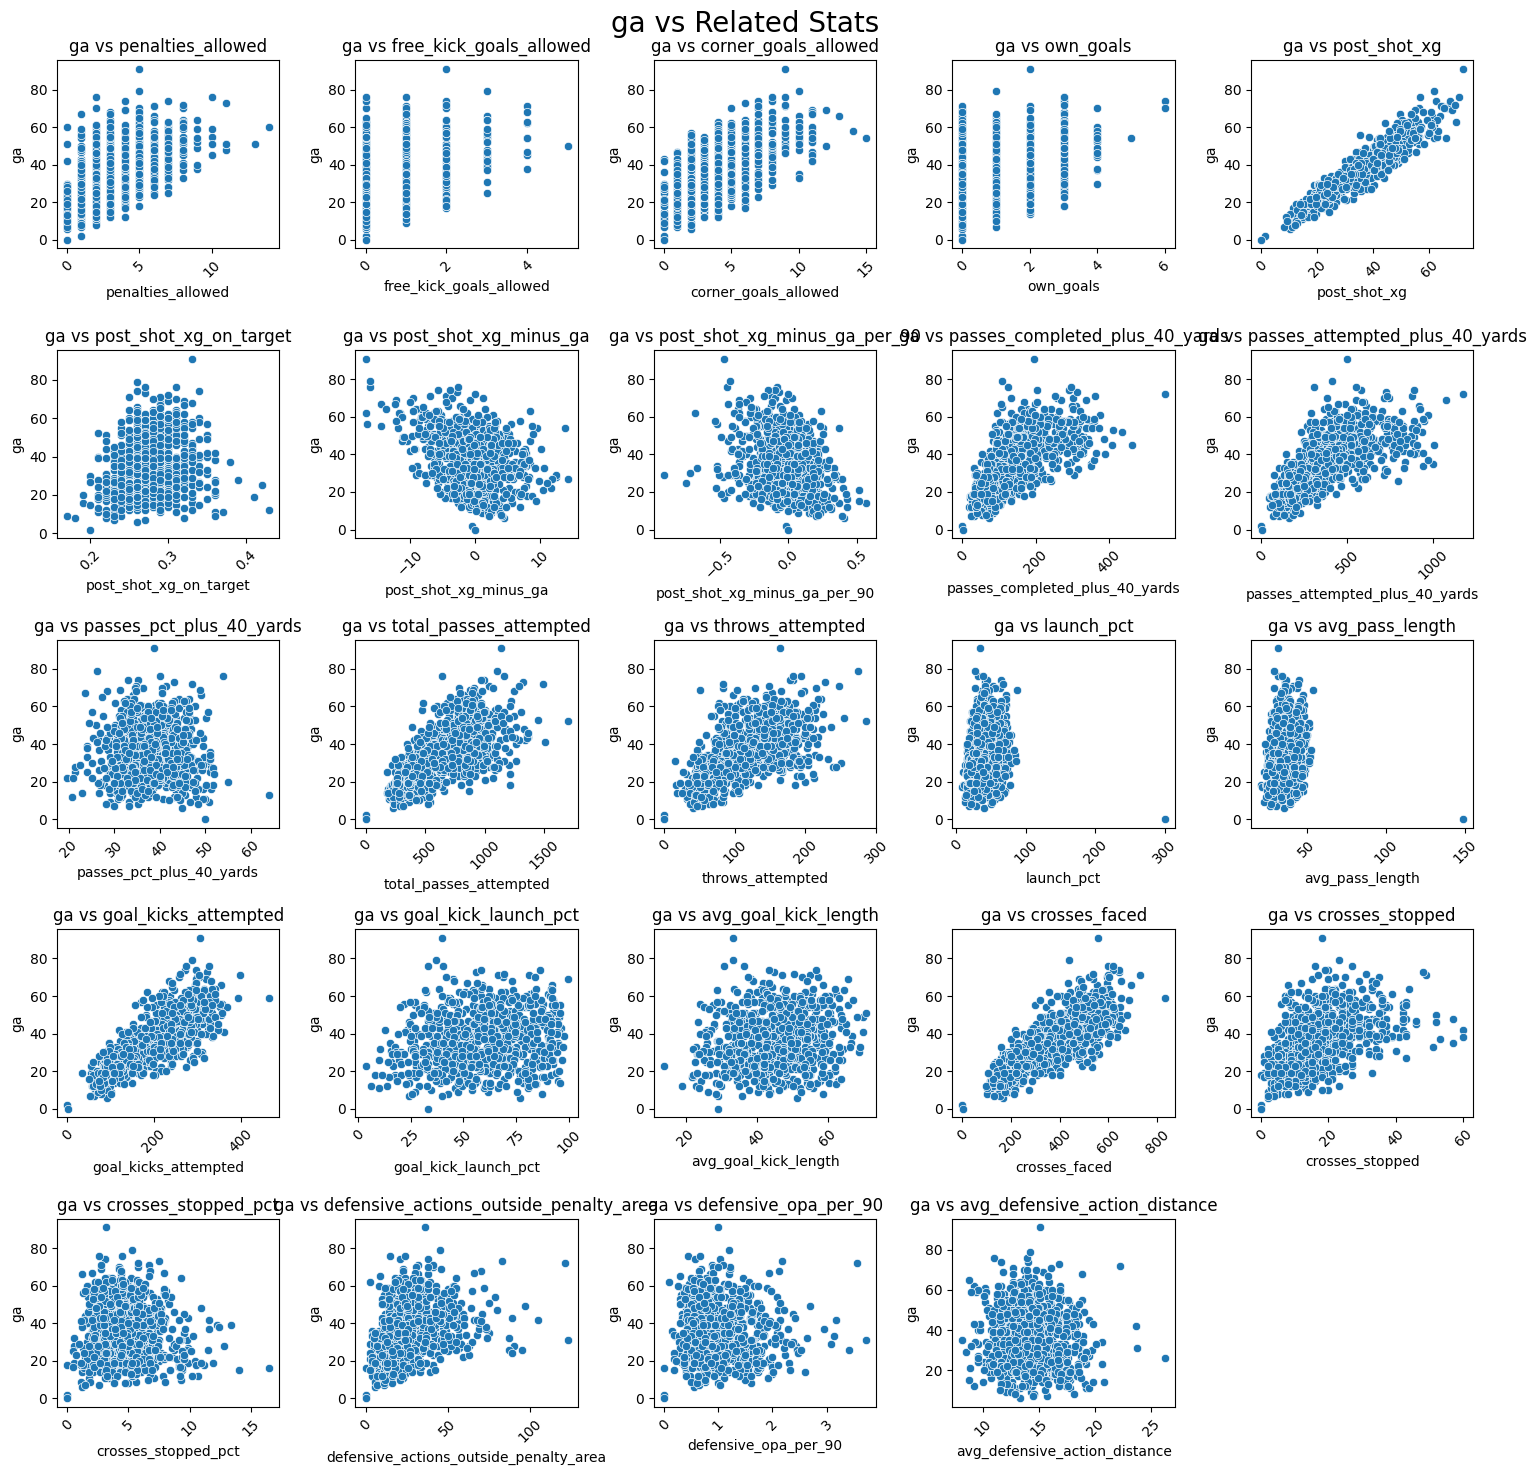

In [25]:
stat_plots.relationships(y='ga', X=cols, nrows=5, ncols=5)

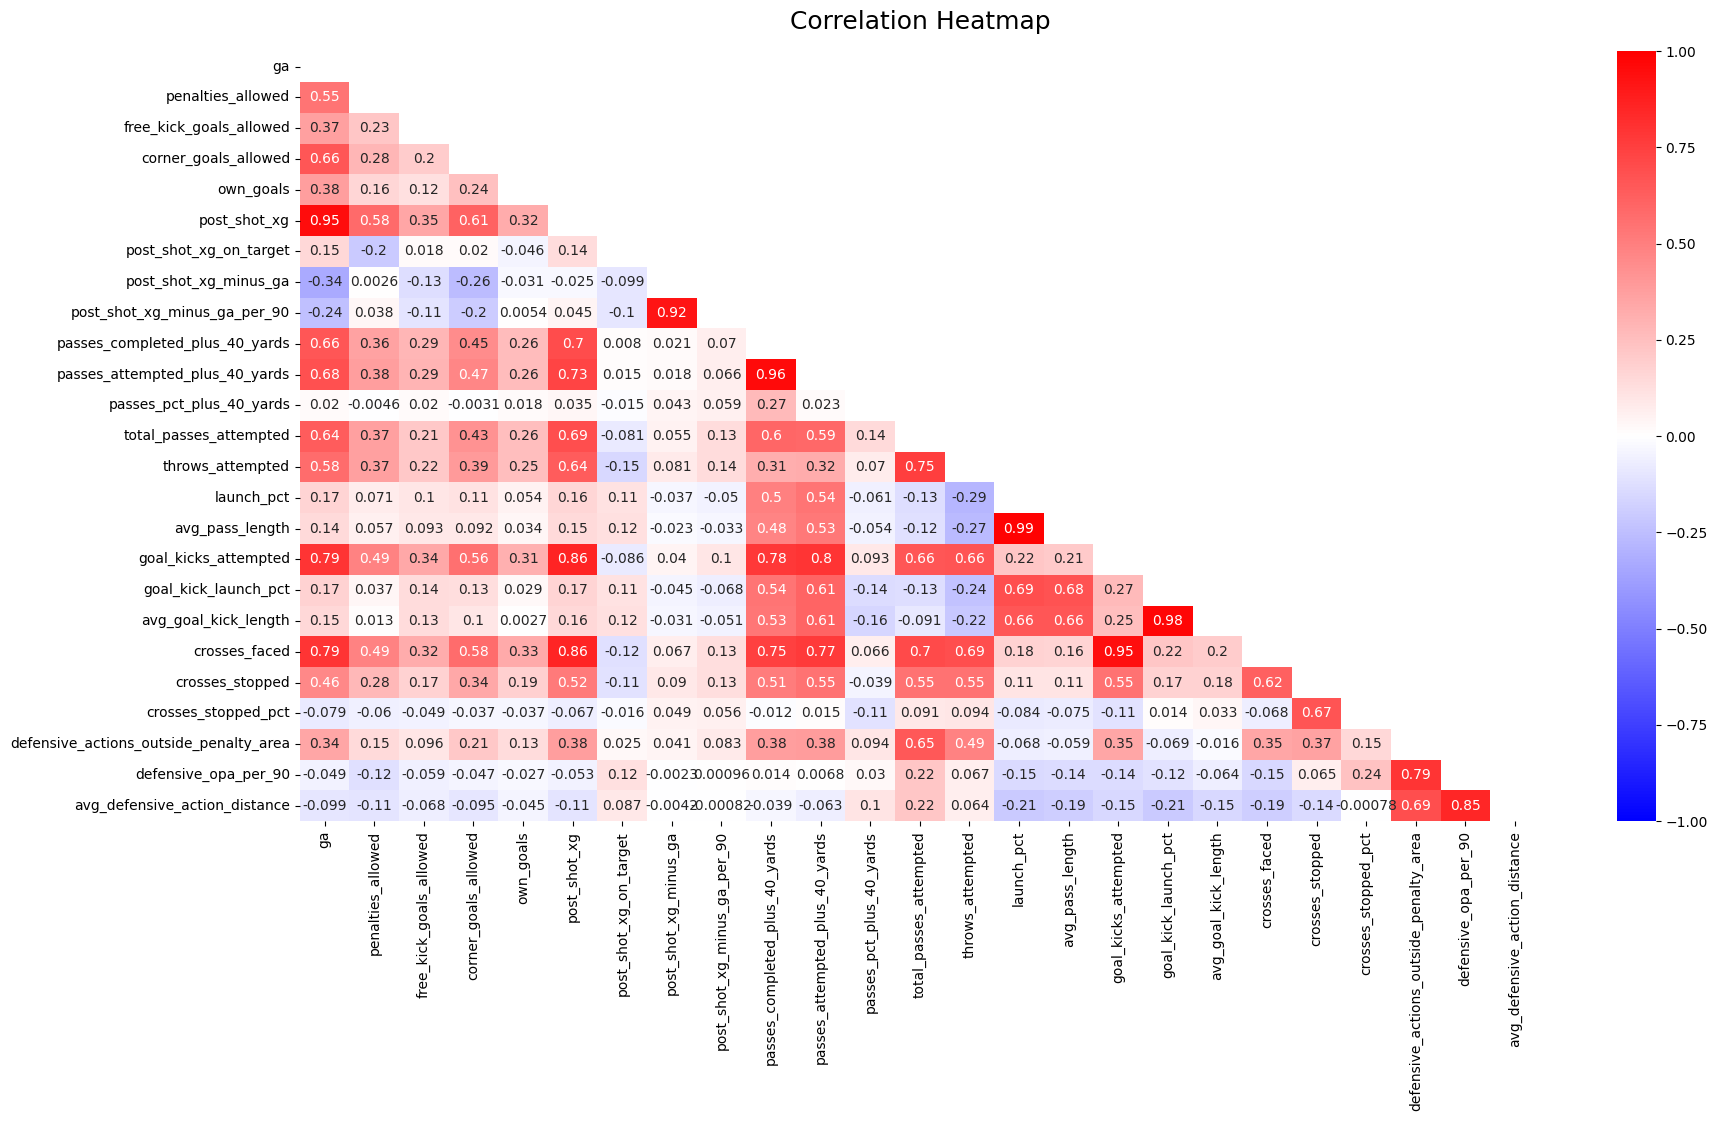

In [26]:
stat_plots.correlation_matrix(cols, figsize=(20, 10))

In [27]:
data_2 = data.loc[data['season'] != '2023-2024']

In [28]:
keeper_plots = StatsVisuals(data_2.reset_index(drop=True))

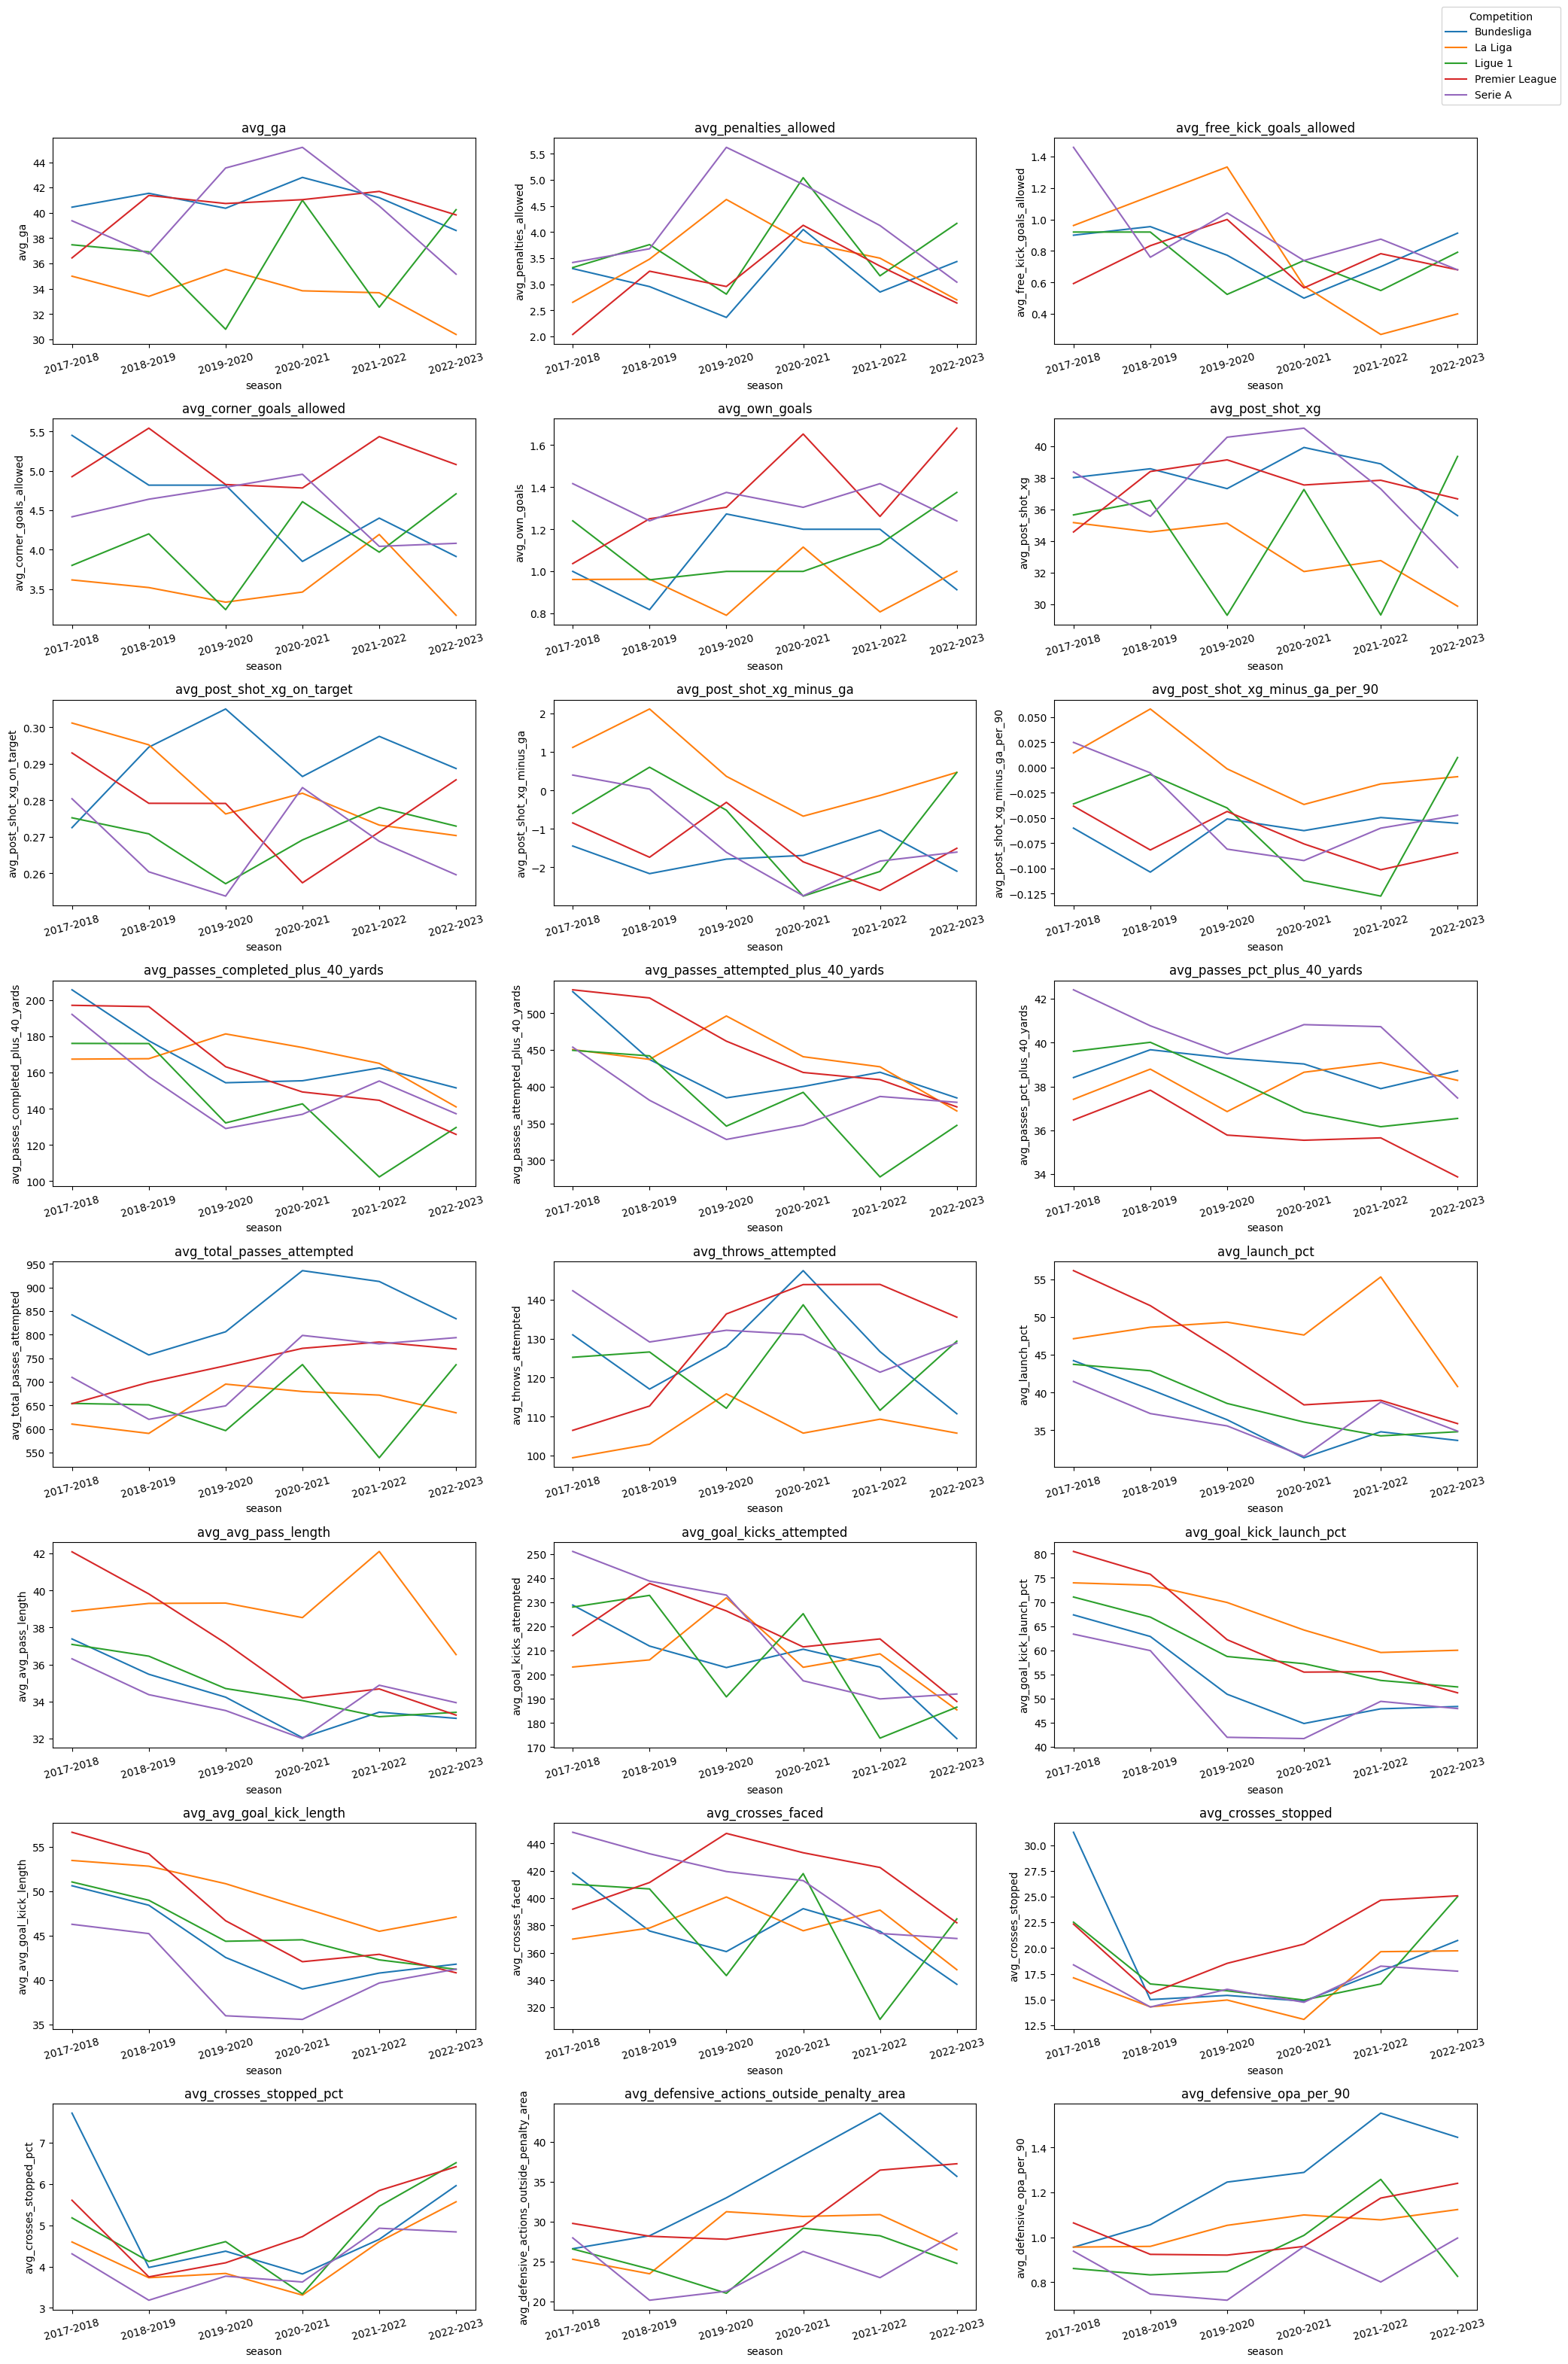

In [30]:
keeper_plots.avgs_time_series(groupby='comp', columns=cols)

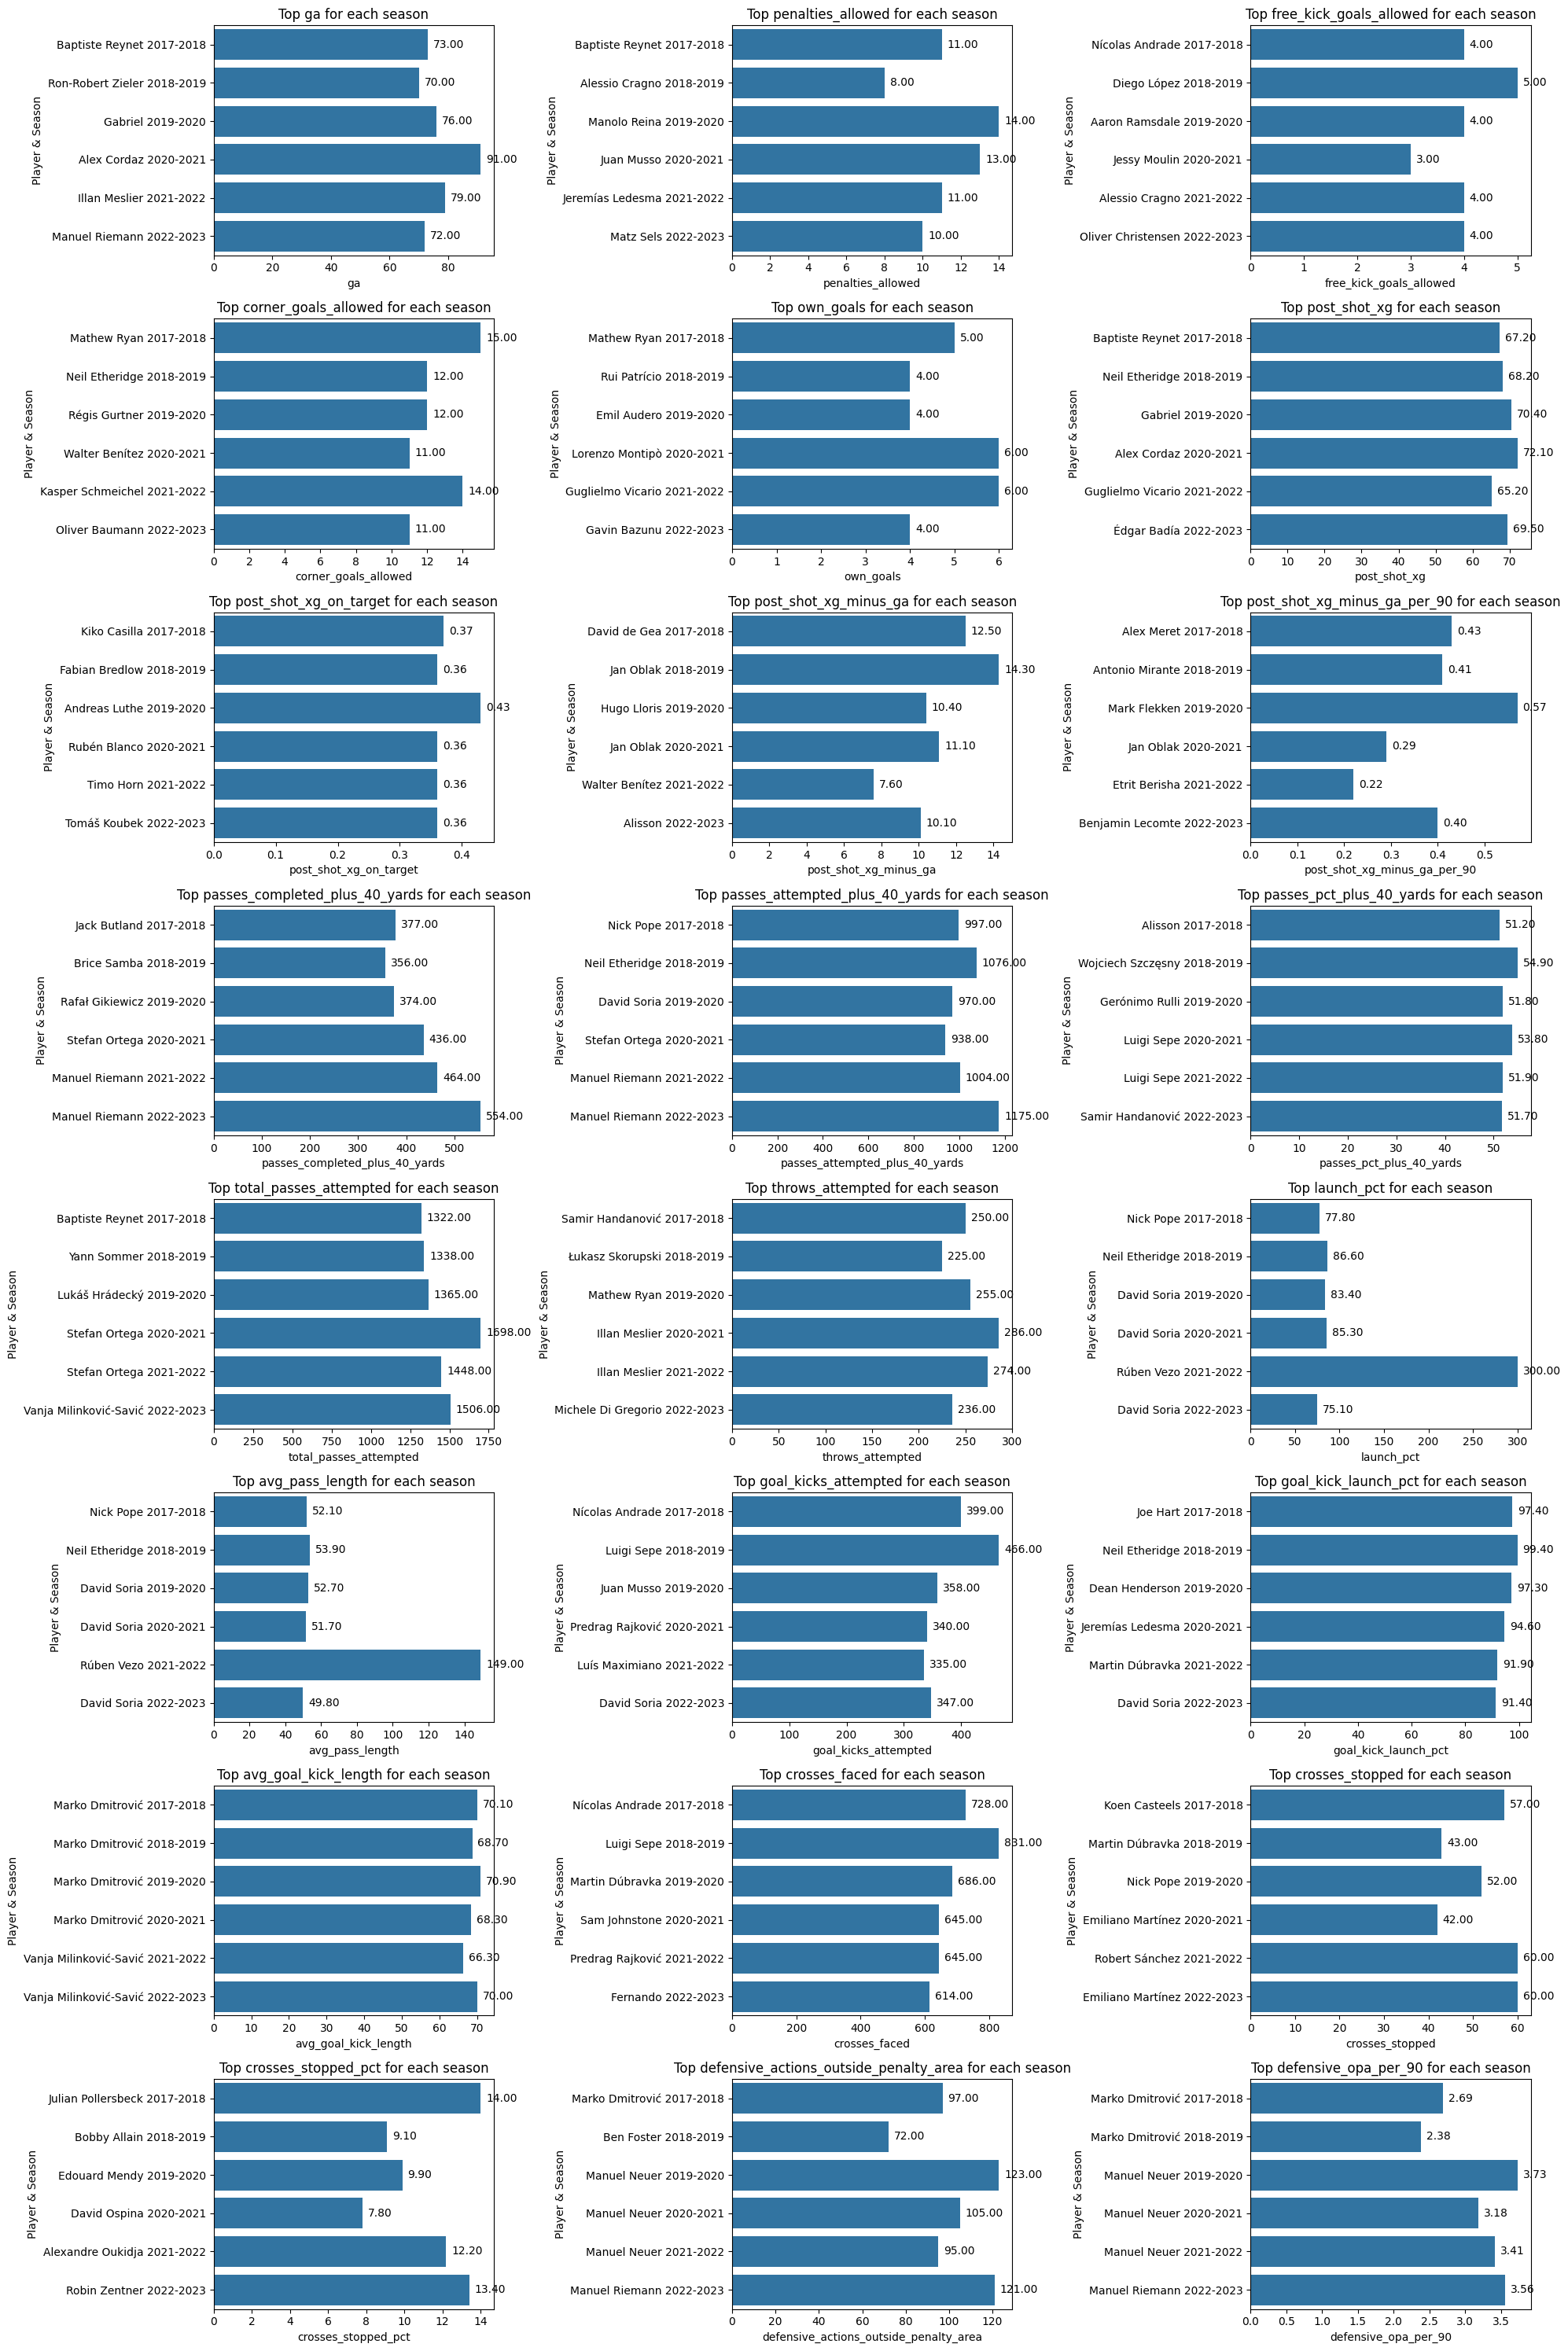

In [31]:
keeper_plots.top_per_season(cols)

- which goal keeper is the best passer? - completed passes, passing distance, pct of passes launched
- which keeper is the best at dealing with crosses?
- which league's goalkeepers face the most crosses?
- which keepers are sweeper keepers?
- which leagues have the most sweeper keepers
- which country produces keepers that launch the ball the most?

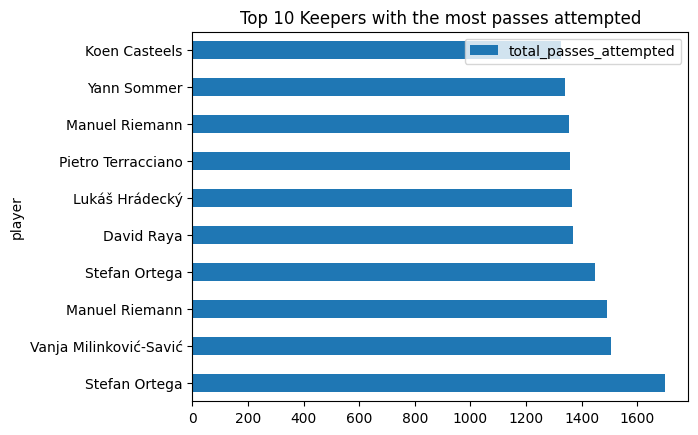

In [32]:
# attempted the most passes
data_2.sort_values(by="total_passes_attempted", ascending=False).head(10).plot(
    x="player", y="total_passes_attempted", kind="barh"
)
plt.title("Top 10 Keepers with the most passes attempted")
plt.show()

In [33]:
# difference between total passes attempted and total 40 yard passes attempted
data_2.loc[:, 'non_40_yard_passes'] = data_2['total_passes_attempted'] - data_2['passes_attempted_plus_40_yards']

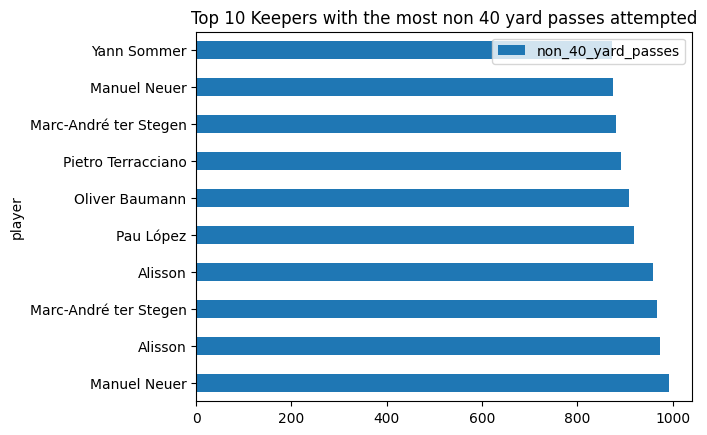

In [34]:
data_2.sort_values(by="non_40_yard_passes", ascending=False).head(10).plot(
    x="player", y="non_40_yard_passes", kind="barh"
)
plt.title("Top 10 Keepers with the most non 40 yard passes attempted")
plt.show()

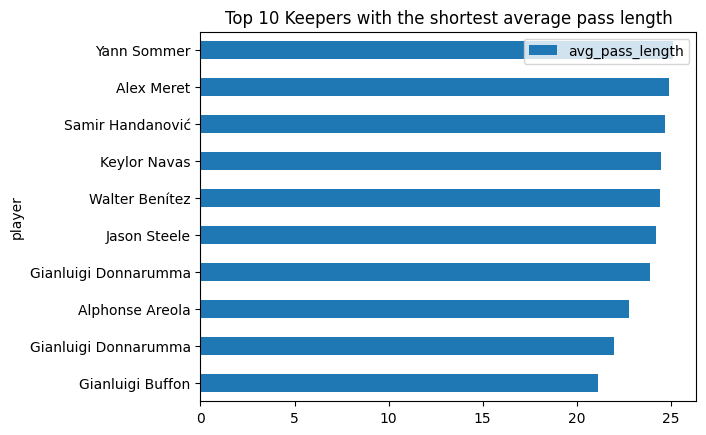

In [35]:
data_2.sort_values("avg_pass_length", ascending=True).head(10).plot(
    x="player", y="avg_pass_length", kind="barh"
)
plt.title("Top 10 Keepers with the shortest average pass length")
plt.show()

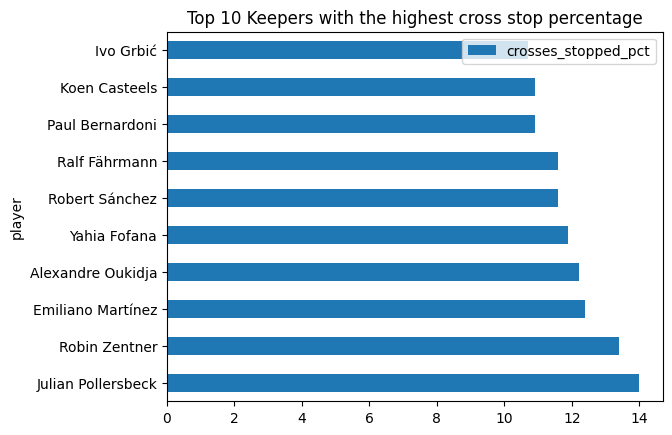

In [36]:
data_2.sort_values("crosses_stopped_pct", ascending=False).head(10).plot(
    x="player", y="crosses_stopped_pct", kind="barh"
)
plt.title("Top 10 Keepers with the highest cross stop percentage")
plt.show()

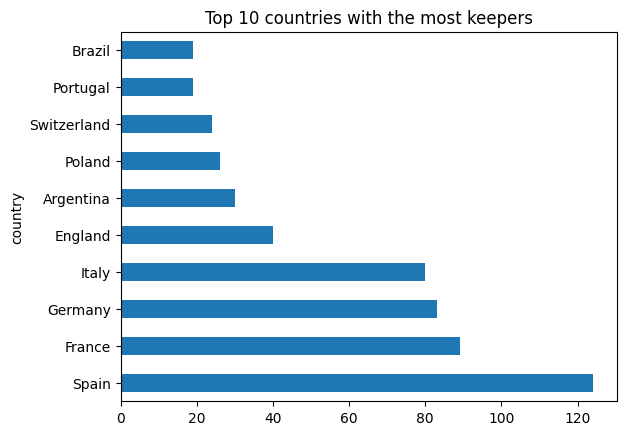

In [37]:
data_2['country'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 countries with the most keepers")
plt.show()

In [38]:
countries = data_2['country'].value_counts().index[:10]
data_3 = data_2.loc[data_2['country'].isin(countries)]

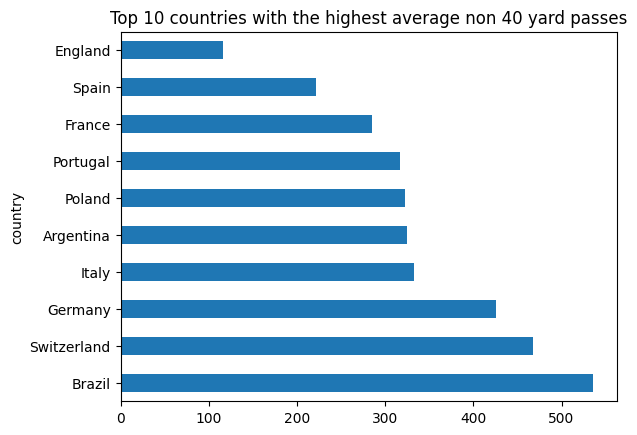

In [39]:
data_3.groupby('country')['non_40_yard_passes'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title("Top 10 countries with the highest average non 40 yard passes")
plt.show()

- England produce keepers in the top 5 leagues who attempt the fewest non 40 yard passes
- Italy, Germany, France, and Spain all have far more keepers playing in the top 5 leagues (completing more than 19 90s) yet still their players make 2 - 3 times more non 40 yard passes
- The lack of England goalkeepers who are comfortable in possession likely explains the reason why Jordan Pickford remains the England first team choice - England want to play a European game, but lack goalkeepers with the appropriate skills.